In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
import yadage_wrapper
import ipywidgets
import logging
logging.basicConfig(level = logging.WARNING)

In [28]:
import multiprocessing
pool = multiprocessing.Pool(processes=50)

In [29]:
kwarglist = [dict(
    backend = 'celery',
    nevents_per_thread = 2500,
    workdir = '/srv/workerdata/workdirs/work{}'.format(energy),
    Gf=1.5e-05,
    sqrtshalf=energy,
) for energy in map(float,np.linspace(40.,50.,51))]
results = [pool.apply_async(yadage_wrapper.run_weinberg_yadage,kwds=kwargs) for kwargs in kwarglist] 

In [30]:
widg = ipywidgets.IntProgress(
    value=0,
    min=0,
    max=len(results),
    step=1,
    description='Yadage Workflows:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)
widg

In [31]:
widg.value = len(filter(lambda x:x,[r.ready() for r in results]))
while not widg.value == widg.max: 
    widg.value = len(filter(lambda x:x,[r.ready() for r in results]))

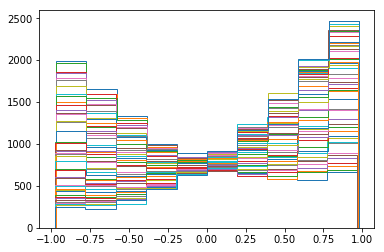

In [37]:
for r in results:
    plt.hist(r.get(), histtype='step')